In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_excel(r"C:\Users\Sindhu\mapping_output.xlsx")

data_test = pd.read_excel(r"C:\Users\Sindhu\mapping_output_test.xlsx")

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf 

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt 
import random
import cv2
import os
import time
import splitfolders 

In [4]:
X = data['Path']  
y = data['RUL']         

In [5]:
X_new = data_test['Path']  
y_new = data_test['RUL'] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=(100,100))
        img_array = img_to_array(img) / 255.0  
        images.append(img_array)
    return np.array(images)

In [8]:
X_train_processed = load_and_preprocess_images(X_train)
X_test_processed = load_and_preprocess_images(X_test)

In [9]:
X_new_processed = load_and_preprocess_images(X_new)

In [10]:
print("Training set:",
      "IMAGES (X):",X_train.shape[0], 
      "LABELS(y):", y_train.shape[0] ,
      "\nTest set :" ,
      "IMAGES (X):", X_test.shape[0],
      "LABELS(y):", y_test.shape[0])

Training set: IMAGES (X): 2880 LABELS(y): 2880 
Test set : IMAGES (X): 720 LABELS(y): 720


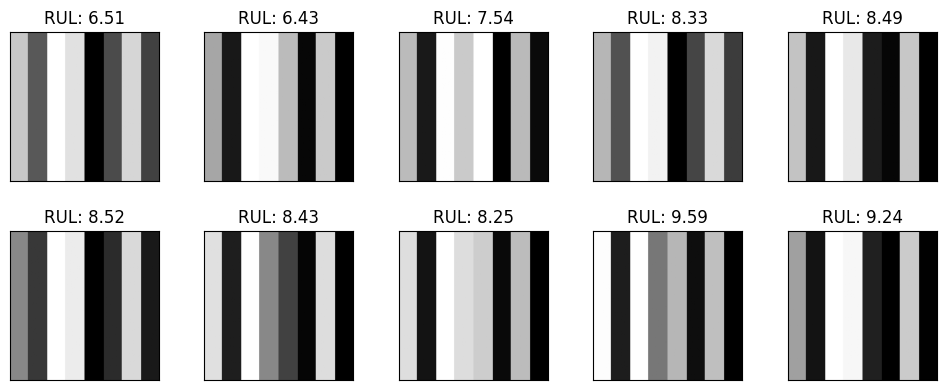

In [13]:
# A random sample of 10 images from the dataset.
plt.figure(figsize=(10, 10))
for i in range(10,20):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('RUL: {:.2f}'.format(y_new.iloc[i]))  
    plt.tight_layout(pad=2)
    plt.imshow(X_new_processed.squeeze()[i], cmap=plt.cm.binary)
plt.show()


In [11]:
def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])

X_train_processed = load_and_preprocess_images(X_train)
X_train_processed = rgb_to_grayscale(X_train_processed)
X_new_processed = load_and_preprocess_images(X_new)
X_new_processed = rgb_to_grayscale(X_new_processed)

In [13]:
import numpy as np

X_train_processed = np.expand_dims(X_train_processed, axis=-1)


In [14]:
X_new_processed = np.expand_dims(X_new_processed, axis=-1)


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class BayesianCNN(tf.keras.Model):
    def __init__(self):
        super(BayesianCNN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', groups=1)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)
        return self.dense2(x)

In [21]:
bayesian_cnn = BayesianCNN()

In [22]:
bayesian_cnn.compile(optimizer=Adam(lr=0.01), loss='mae', metrics=['mae'])

In [23]:
history = bayesian_cnn.fit(X_train_processed, y_train, batch_size=16, epochs=9, validation_split=0.2)

Epoch 1/9



144/144 [==============================] - 48s 317ms/step - loss: 2.7826 - mae: 2.7826 - val_loss: 1.3961 - val_mae: 1.3961
Epoch 2/9
144/144 [==============================] - 42s 289ms/step - loss: 1.9661 - mae: 1.9661 - val_loss: 1.2481 - val_mae: 1.2481
Epoch 3/9
144/144 [==============================] - 42s 290ms/step - loss: 1.8206 - mae: 1.8206 - val_loss: 1.5669 - val_mae: 1.5669
Epoch 4/9
144/144 [==============================] - 40s 279ms/step - loss: 1.6980 - mae: 1.6980 - val_loss: 1.1466 - val_mae: 1.1466
Epoch 5/9
144/144 [==============================] - 41s 283ms/step - loss: 1.7393 - mae: 1.7393 - val_loss: 1.1578 - val_mae: 1.1578
Epoch 6/9
144/144 [==============================] - 43s 297ms/step - loss: 1.6598 - mae: 1.6598 - val_loss: 1.2904 - val_mae: 1.2904
Epoch 7/9
144/144 [==============================] - 42s 288ms/step - loss: 1.6407 - mae: 1.6407 - val_loss: 1.1586 - val_mae: 1.1586
Epoch 8/9
144/144 [==============================] - 40s 280ms/step - lo

In [33]:
import matplotlib.pyplot as plt
loss = history.history['loss']
mse = history.history['mae']
epochs = range(1, len(loss) + 1)

Text(0.5, 0, 'Epochs')

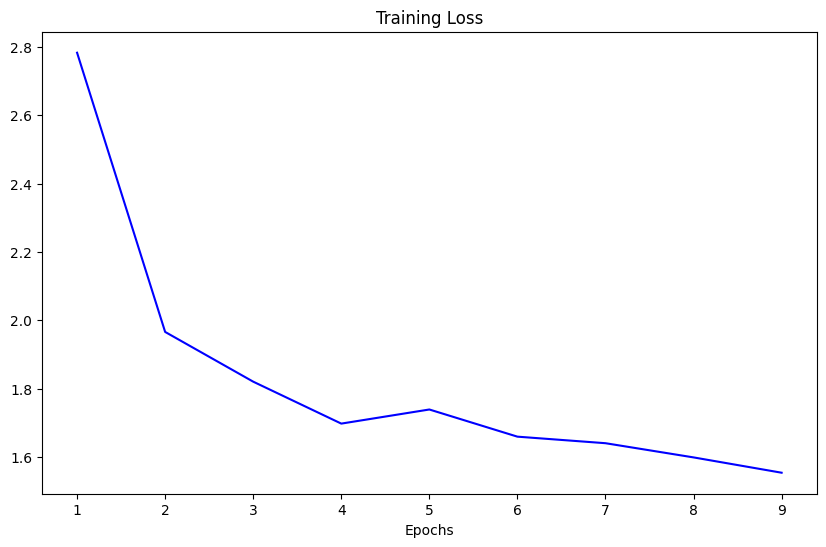

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')

In [29]:

bayesian_cnn.save_weights('bcnn_model_weights.h5')

SyntaxError: unterminated triple-quoted string literal (detected at line 2) (1815943406.py, line 2)

In [ ]:

bayesian_cnn.save('bcnn_model_save', save_format='tf')


In [15]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('bcnn_model_save')

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess your data
X_test_processed = load_and_preprocess_images(X_test)
X_test_processed = rgb_to_grayscale(X_test_processed)
X_test_processed = np.expand_dims(X_test_processed, axis=-1)
y_pred = loaded_model.predict(X_test_processed)

23/23 [==============================] - 3s 39ms/step


In [17]:
class BayesianDenseVI(Layer):
    def __init__(self, units, activation='relu'):
        super(BayesianDenseVI, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        self.batch_norm = BatchNormalization()

    def build(self, input_shape):
        self.mean = self.add_weight(shape=(input_shape[-1], self.units),
                                     initializer='random_normal',
                                     trainable=True,
                                     name='mean')
        self.rho = self.add_weight(shape=(input_shape[-1], self.units),
                                    initializer='zeros',
                                    trainable=True,
                                    name='rho')

    def call(self, inputs):
        epsilon = tf.random.normal(shape=tf.shape(self.mean))
        weights = self.mean + tf.math.log(1 + tf.exp(self.rho)) * epsilon
        x = tf.matmul(inputs, weights)
        x = self.batch_norm(x)
        return self.activation(x)


In [18]:
pretrained_model_path = r'C:\Users\Sindhu\Major\bcnn_model_save'
pre_trained_model = tf.keras.models.load_model(pretrained_model_path)

for layer in pre_trained_model.layers[:-4]:
    layer.trainable = False
    
pre_trained_model.layers[-1] = BayesianDenseVI(units=1, activation='relu')

def kl_divergence_regularizer(model):
    kl_loss = sum(model.losses)
    return kl_loss

def custom_loss(y_true, y_pred):
    original_loss = tf.keras.losses.mean_absolute_error(y_true, y_pred)
    kl_loss = kl_divergence_regularizer(pre_trained_model)
    return original_loss + kl_loss


In [19]:
optimizer = Adam(lr=0.000001)  # Adjust learning rate

pre_trained_model.compile(optimizer=optimizer, loss=custom_loss, metrics=['mae'])


In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history_transfer_learning = pre_trained_model.fit(X_new_processed, y_new, 
                                                  batch_size=16, 
                                                  epochs=10, 
                                                  validation_data=(X_new_processed, y_new), 
                                                  callbacks=[early_stopping])


Epoch 1/10



10/10 [==============================] - 11s 630ms/step - loss: 1.7474 - mae: 1.7474 - val_loss: 0.9905 - val_mae: 0.9905
Epoch 2/10
10/10 [==============================] - 3s 295ms/step - loss: 1.6840 - mae: 1.6840 - val_loss: 1.1697 - val_mae: 1.1697
Epoch 3/10
10/10 [==============================] - 3s 282ms/step - loss: 1.5774 - mae: 1.5774 - val_loss: 1.0902 - val_mae: 1.0902
Epoch 4/10
10/10 [==============================] - 3s 311ms/step - loss: 1.5171 - mae: 1.5171 - val_loss: 0.9185 - val_mae: 0.9185
Epoch 5/10
10/10 [==============================] - 3s 291ms/step - loss: 1.5583 - mae: 1.5583 - val_loss: 1.1404 - val_mae: 1.1404
Epoch 6/10
10/10 [==============================] - 3s 290ms/step - loss: 1.5852 - mae: 1.5852 - val_loss: 1.2222 - val_mae: 1.2222
Epoch 7/10
10/10 [==============================] - 3s 280ms/step - loss: 1.5816 - mae: 1.5816 - val_loss: 0.9680 - val_mae: 0.9680
Epoch 8/10
10/10 [==============================] - 3s 311ms/step - loss: 1.7548 - mae

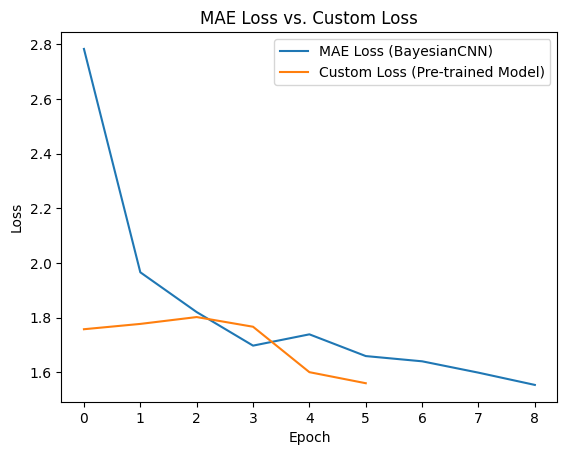

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='MAE Loss (BayesianCNN)')
plt.plot(history_transfer_learning.history['loss'], label='Custom Loss (Pre-trained Model)')
plt.title('MAE Loss vs. Custom Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

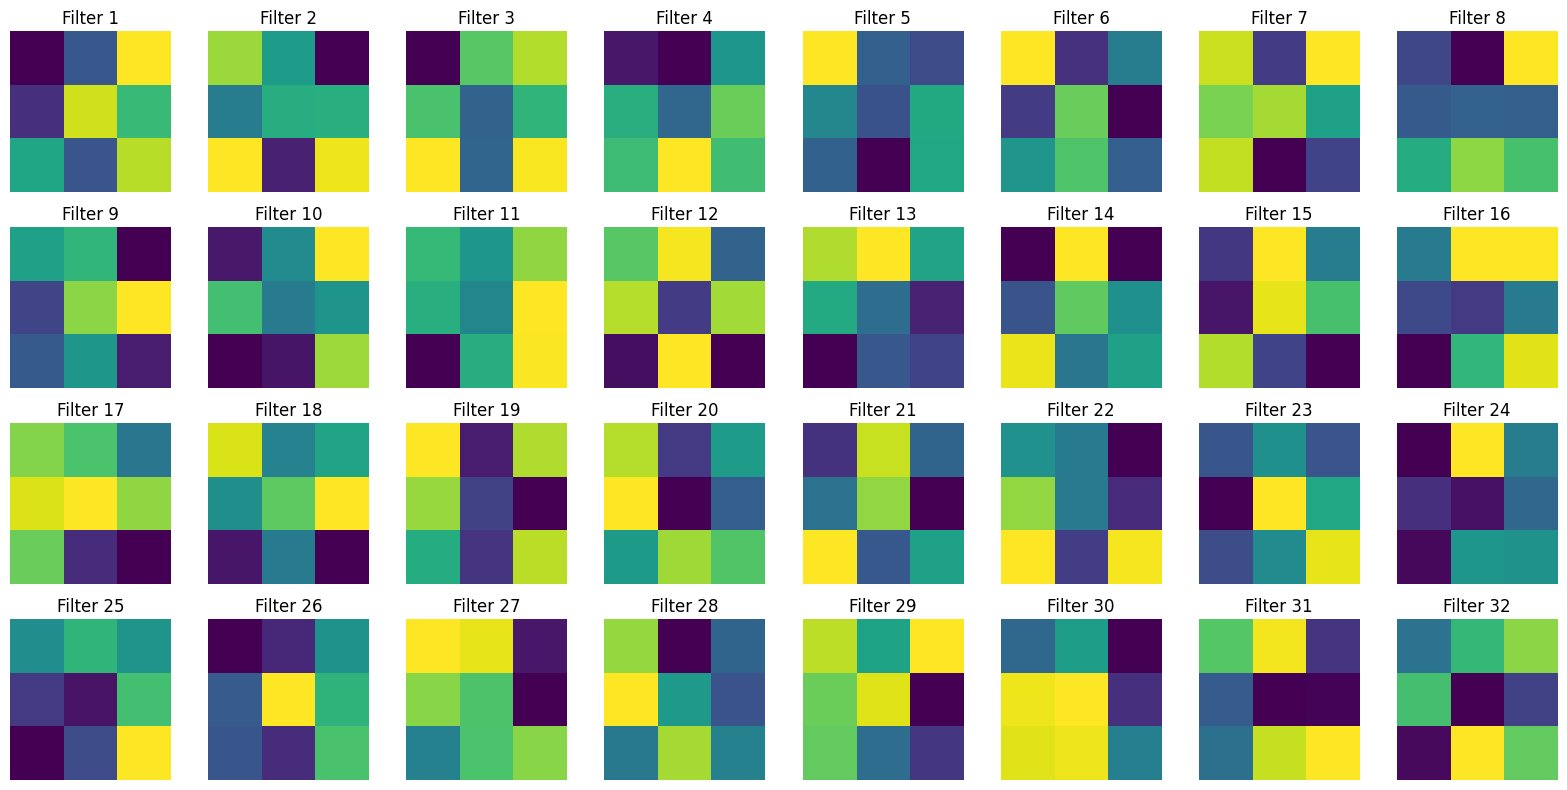

In [60]:
import matplotlib.pyplot as plt

# Extract and visualize convolutional filters
filters, biases = bayesian_cnn.conv1.get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

def feature_dropout_importance(model, X, y_true):
    baseline_loss, _ = model.evaluate(X, y_true, verbose=0)
    importance_scores = []
    for i in range(X.shape[1]):
        X_drop = X.copy()
        X_drop[:, i] = 0
        loss_drop, _ = model.evaluate(X_drop, y_true, verbose=0)
        importance_score = (baseline_loss - loss_drop) / baseline_loss
        importance_scores.append(importance_score)
    return importance_scores

   
n_filters = filters.shape[3]
rows = 4
cols = n_filters // rows

plt.figure(figsize=(cols * 2, rows * 2))

for i in range(n_filters):
    f = filters[:, :, 0, i]  # Accessing the first channel of the filter
    plt.subplot(rows, cols, i+1)
    plt.imshow(f, cmap='viridis')
    plt.title(f'Filter {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 1s/step
RUL : 7 hrs and 41 mins left
System is Safe


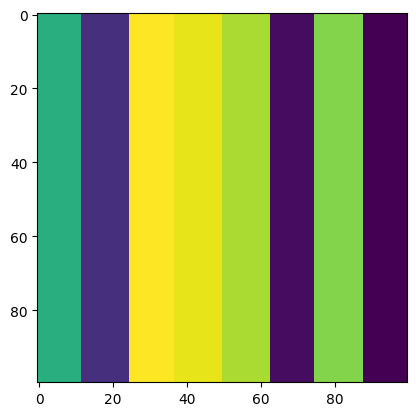

In [36]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = r'C:\Users\Sindhu\3class_intensity\1101.png'
img = load_img(image_path, target_size=(100, 100), color_mode='grayscale') 
img_array = img_to_array(img) / 255.0  
input_image = np.expand_dims(img_array, axis=0)
prediction = pre_trained_model.predict(input_image)
plt.imshow(img)
#print("RUL Predicted value:", prediction)
#print(f"RUL : {prediction[0][0]:.2f} hrs")
pred = round(prediction[0][0], 1)
#print(pred)
def convert_decimal_to_time(decimal_value):
    hours = int(decimal_value) 
    minutes = int((decimal_value - hours) * 60)  
    return f"{hours} hrs and {minutes:02d} mins"  
time_string = convert_decimal_to_time(pred)
 
print(f"RUL : {time_string} left")

if(prediction>=6 and prediction<=10):
    print("System is Safe")
elif(prediction>=4 and prediction<6):
    print("Defective Realm")
elif(prediction<4):
    print("ALERT: EOL!!!")
else:
    print("Error Calculating")

In [36]:
import os
import random

image_dir = r'C:\Users\Sindhu\3class_intensity'

random_indices = random.sample(range(3600), 100)

for i in random_indices:
    image_path = os.path.join(image_dir, f"{i}.png")
    
    img = load_img(image_path, target_size=(100, 100), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    input_image = np.expand_dims(img_array, axis=0)
    
    prediction = pre_trained_model.predict(input_image)
    
    print(f"Image {i}.png - Predicted RUL:", prediction)


1/1 [==============================] - 0s 72ms/step
Image 672.png - Predicted RUL: [[6.230028]]
1/1 [==============================] - 0s 96ms/step
Image 2123.png - Predicted RUL: [[3.825014]]
1/1 [==============================] - 0s 81ms/step
Image 3149.png - Predicted RUL: [[2.5444686]]
1/1 [==============================] - 0s 80ms/step
Image 2971.png - Predicted RUL: [[1.5405512]]
1/1 [==============================] - 0s 76ms/step
Image 3083.png - Predicted RUL: [[1.0979043]]
1/1 [==============================] - 0s 67ms/step
Image 1212.png - Predicted RUL: [[3.0518818]]
1/1 [==============================] - 0s 71ms/step
Image 3081.png - Predicted RUL: [[2.9320433]]
1/1 [==============================] - 0s 79ms/step
Image 2456.png - Predicted RUL: [[3.4580348]]
1/1 [==============================] - 0s 81ms/step
Image 3335.png - Predicted RUL: [[2.7919693]]
1/1 [==============================] - 0s 73ms/step
Image 2916.png - Predicted RUL: [[3.3057485]]
1/1 [==================